# <b> COVID SAFE TO VISIT?

## <b>Imports

In [80]:
import requests
import json
import locale
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## <b> Constant variables

In [81]:
MILLION = 1000000
SAFE = 'safe'
PRECAUTION_NEEDED = 'precaution_needed'
BAD = 'bad'
DANGEROUS = 'dangerous'
GREAT = 'great'
GOOD = 'good'
WORSE = 'worse'
VERY_SLOW = 'very_slow'
SLOW = 'slow'
FAST = 'fast'
VERY_FAST = 'very_fast'
LINE_WIDTH = 1.5
ZERO = 0

## <b>Input the country you to visit to 

In [82]:
# COUNTRY = str(input('Country: '))
# print(f' Country selected: {COUNTRY}')
COUNTRY = 'japan'

## <b>Request from COVID-19 API
#### Sauce: https://rapidapi.com/api-sports/api/covid-193/details

In [83]:
url = f"https://covid-193.p.rapidapi.com/statistics?country={COUNTRY}"


headers = {
    'x-rapidapi-host': "covid-193.p.rapidapi.com",
    'x-rapidapi-key': "a40d7aa2f4msh6a00fe6828f23d5p171ae9jsna21e56f053e1"
}

response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)

## <b>Extracting data from the API

In [84]:
active_cases = int(data['response'][0]['cases']['active'])
total_cases = int(data['response'][0]['cases']['total'])
recovered_cases = int(data['response'][0]['cases']['recovered'])
M1_pop = int(data['response'][0]['cases']['1M_pop'])

## <b>Computation and Formula for Covid Growth and Recovered Percentage </b>
### <i> Disclaimer: the formula below is not from the experts of the matter, but a formuated formula constructed by myself in a form of trial and error practice

In [85]:

covid_growth = ((active_cases/total_cases) + (M1_pop/MILLION))*100
recovered_percent = 100 - (recovered_cases/total_cases*100)

if(covid_growth > 10):
    covid_growth = 10

if(recovered_percent > 10):
    recovered_percent = 10

print(f'{COUNTRY} Covid Growth: {covid_growth:n}')
print(f'{COUNTRY} Recovered Percentage: {recovered_percent:n}')

japan Covid Growth: 1.85159
japan Recovered Percentage: 1.54604


## <b>Defining variables for the system

In [86]:
plot_covid_growth = np.arange(0, 11, 1)
plot_recovered_percent = np.arange(0, 11, 1)
plot_of_safety = np.arange(0, 11, 1)

graph_covid_growth = {
    VERY_SLOW: fuzz.trimf(plot_covid_growth, [0, 0, 2]),
    SLOW: fuzz.trimf(plot_covid_growth, [1, 2, 4]),
    FAST: fuzz.trimf(plot_covid_growth, [3, 5, 6]),
    VERY_FAST: fuzz.trimf(plot_covid_growth, [5, 10, 10])
}

graph_recovered_percent = {
    GREAT: fuzz.trimf(plot_recovered_percent, [0, 0, 3]),
    GOOD: fuzz.trimf(plot_recovered_percent, [1, 3, 5]),
    BAD: fuzz.trimf(plot_recovered_percent, [3, 6, 7]),
    WORSE: fuzz.trimf(plot_recovered_percent, [5, 10, 10])
}

graph_safeness = {
    SAFE: fuzz.trapmf(plot_of_safety, [0, 0, 0, 2]),
    PRECAUTION_NEEDED: fuzz.trapmf(plot_of_safety, [1, 3, 4, 5]),
    BAD: fuzz.trapmf(plot_of_safety, [3, 5, 6, 7]),
    DANGEROUS: fuzz.trapmf(plot_of_safety, [6, 8, 10, 10])
}


## <b> Visualize universes and membership functions

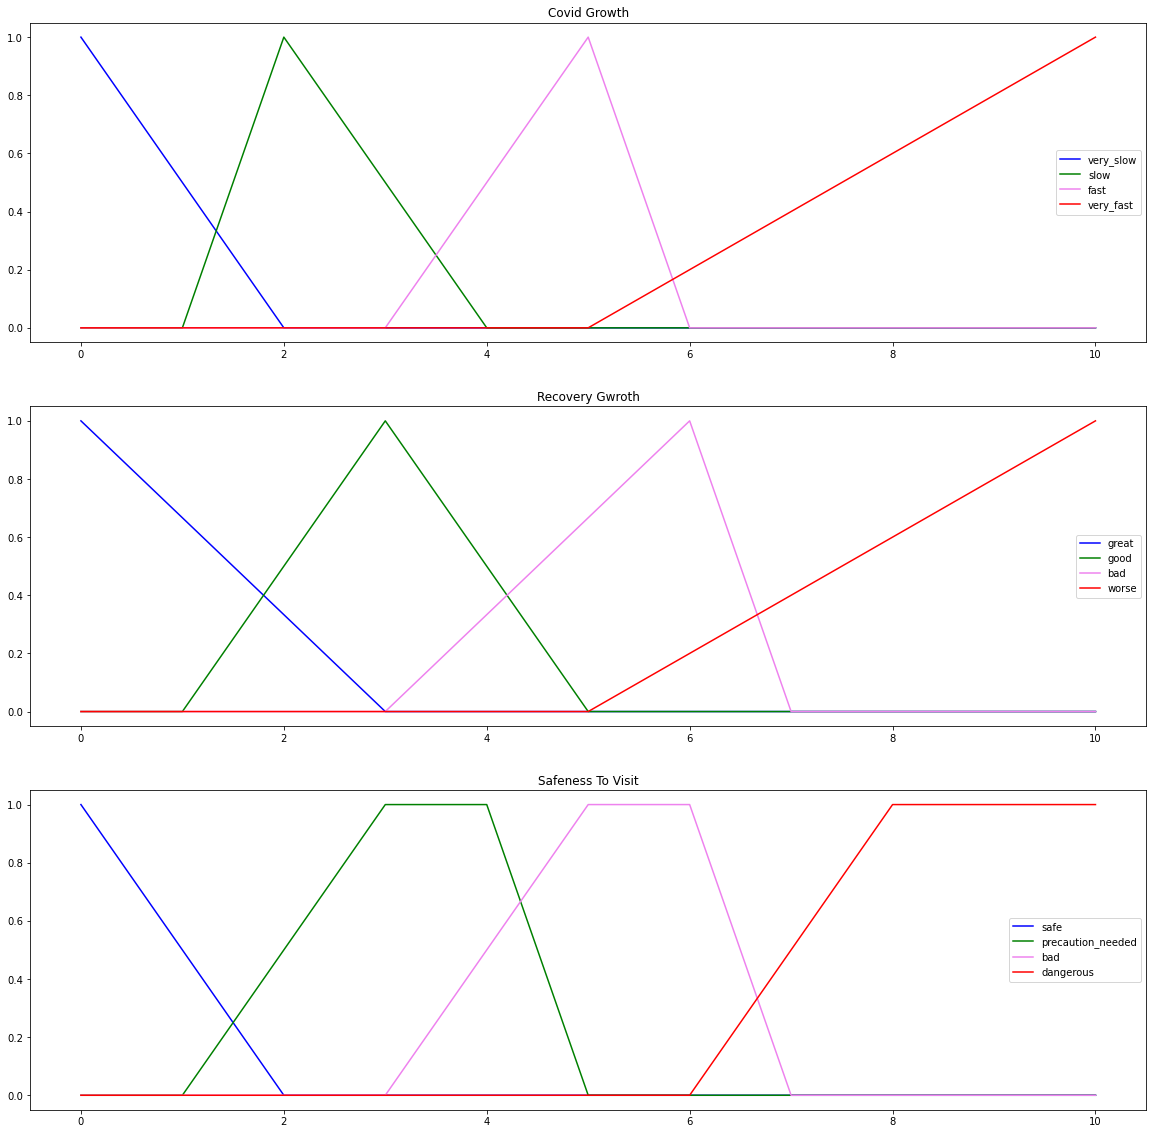

In [87]:
fig, (graph1, graph2, graph3) = plt.subplots(nrows=3, figsize=(20, 20))

graph1.plot(plot_covid_growth,
            graph_covid_growth[VERY_SLOW], 'blue', linewidth=LINE_WIDTH, label=VERY_SLOW)
graph1.plot(plot_covid_growth,
            graph_covid_growth[SLOW], 'green', linewidth=LINE_WIDTH, label=SLOW)
graph1.plot(plot_covid_growth,
            graph_covid_growth[FAST], 'violet', linewidth=LINE_WIDTH, label=FAST)
graph1.plot(plot_covid_growth,
            graph_covid_growth[VERY_FAST], 'red', linewidth=LINE_WIDTH, label=VERY_FAST)
graph1.set_title('Covid Growth')


graph2.plot(plot_recovered_percent,
            graph_recovered_percent[GREAT], 'blue', linewidth=LINE_WIDTH, label=GREAT)
graph2.plot(plot_recovered_percent,
            graph_recovered_percent[GOOD], 'green', linewidth=LINE_WIDTH, label=GOOD)
graph2.plot(plot_recovered_percent,
            graph_recovered_percent[BAD], 'violet', linewidth=LINE_WIDTH, label=BAD)
graph2.plot(plot_recovered_percent,
            graph_recovered_percent[WORSE], 'red', linewidth=LINE_WIDTH, label=WORSE)
graph2.set_title('Recovery Gwroth')


graph3.plot(plot_recovered_percent,
            graph_safeness[SAFE], 'blue', linewidth=LINE_WIDTH, label=SAFE)
graph3.plot(plot_recovered_percent,
            graph_safeness[PRECAUTION_NEEDED], 'green', linewidth=LINE_WIDTH, label=PRECAUTION_NEEDED)
graph3.plot(plot_recovered_percent,
            graph_safeness[BAD], 'violet', linewidth=LINE_WIDTH, label=BAD)
graph3.plot(plot_recovered_percent,
            graph_safeness[DANGEROUS], 'red', linewidth=LINE_WIDTH, label=DANGEROUS)
graph3.set_title('Safeness To Visit')


graph1.legend()
graph2.legend()
graph3.legend()


## <b> Data fuzzyfication

In [88]:

fuzzificaton_covid_growth = {
    VERY_SLOW: fuzz.interp_membership(plot_covid_growth,
                                      graph_covid_growth[VERY_SLOW], covid_growth),
    SLOW: fuzz.interp_membership(plot_covid_growth,
                                 graph_covid_growth[SLOW], covid_growth),
    FAST: fuzz.interp_membership(plot_covid_growth,
                                 graph_covid_growth[FAST], covid_growth),
    VERY_FAST: fuzz.interp_membership(plot_covid_growth,
                                      graph_covid_growth[VERY_FAST], covid_growth),
}

fuzzification_recovered_percenth = {
    GREAT: fuzz.interp_membership(plot_recovered_percent,
                                  graph_recovered_percent[GREAT], recovered_percent),
    GOOD: fuzz.interp_membership(plot_covid_growth,
                                 graph_recovered_percent[GOOD], recovered_percent),
    BAD: fuzz.interp_membership(plot_covid_growth,
                                graph_recovered_percent[BAD], recovered_percent),
    WORSE: fuzz.interp_membership(plot_covid_growth,
                                  graph_recovered_percent[WORSE], recovered_percent),
}


## <b> Fuzzy System Rules
### 1. if covid Growth is VERY_SLOW or recovery is GREAT then country is SAFE to visit 
### 2. if covid Growth is SLOW or recovery is GOOD then country is PRECAUTION_NEEDED to visit
### 3. if covid Growth is FAST or recovery is BAD then country is BAD to visit
### 4. if covid Growth is VERY_FAST or recovery is WORSE then country is DANGEROUS to visit

In [89]:
rule = {
    1: np.fmax(fuzzificaton_covid_growth[VERY_SLOW], fuzzification_recovered_percenth[GREAT]),
    2: np.fmax(fuzzificaton_covid_growth[SLOW], fuzzification_recovered_percenth[GOOD]),
    3: np.fmax(fuzzificaton_covid_growth[FAST], fuzzification_recovered_percenth[BAD]),
    4: np.fmax(fuzzificaton_covid_growth[VERY_FAST], fuzzification_recovered_percenth[WORSE])
}

## <b> Rule Application


In [90]:
rule_activation = {
    ZERO: np.zeros_like(plot_of_safety),
    SAFE: np.fmin(rule[1], graph_safeness[SAFE]),
    PRECAUTION_NEEDED: np.fmin(rule[2], graph_safeness[PRECAUTION_NEEDED]),
    BAD: np.fmin(rule[3], graph_safeness[BAD]),
    DANGEROUS: np.fmin(rule[4], graph_safeness[DANGEROUS]),
}

## <b>  Fuzzy Interface Graph Result

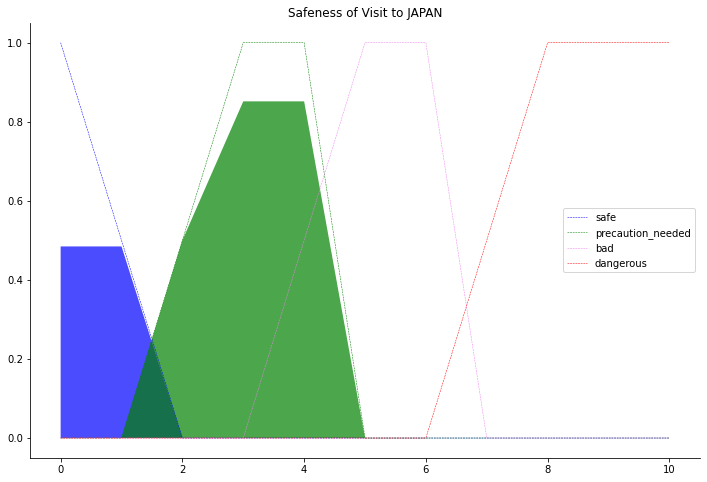

In [91]:

fig, graph4 = plt.subplots(figsize=(12, 8))

graph4.fill_between(
    plot_of_safety, rule_activation[ZERO], rule_activation[SAFE], facecolor='b', alpha=0.7)
graph4.plot(plot_of_safety, graph_safeness[SAFE],
            'b', linewidth=0.5, linestyle='--', label=SAFE)
graph4.fill_between(
    plot_of_safety, rule_activation[ZERO], rule_activation[PRECAUTION_NEEDED], facecolor='g', alpha=0.7)
graph4.plot(plot_of_safety,
            graph_safeness[PRECAUTION_NEEDED], 'g', linewidth=0.5, linestyle='--', label=PRECAUTION_NEEDED)
graph4.fill_between(
    plot_of_safety, rule_activation[ZERO], rule_activation[BAD], facecolor='r', alpha=0.7)
graph4.plot(plot_of_safety, graph_safeness[BAD],
            'violet', linewidth=0.5, linestyle='--', label=BAD)
graph4.fill_between(plot_of_safety, rule_activation[ZERO],
                    rule_activation[DANGEROUS], facecolor='violet', alpha=0.7)
graph4.plot(plot_of_safety,
            graph_safeness[DANGEROUS], 'r', linewidth=0.5, linestyle='--', label=DANGEROUS)
graph4.set_title(f'Safeness of Visit to {COUNTRY.upper()}')
graph4.legend()

for ax in (graph4,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


## <b> Data Defuzzification 

In [92]:
aggregated = np.fmax(rule_activation[SAFE], np.fmax(
    rule_activation[PRECAUTION_NEEDED], np.fmax(rule_activation[BAD], rule_activation[DANGEROUS])))

safeness = fuzz.defuzz(plot_of_safety, aggregated, 'centroid')
safeness_activation = fuzz.interp_membership(
    plot_of_safety, aggregated, safeness)  



## <b> Aggregated Result Graph


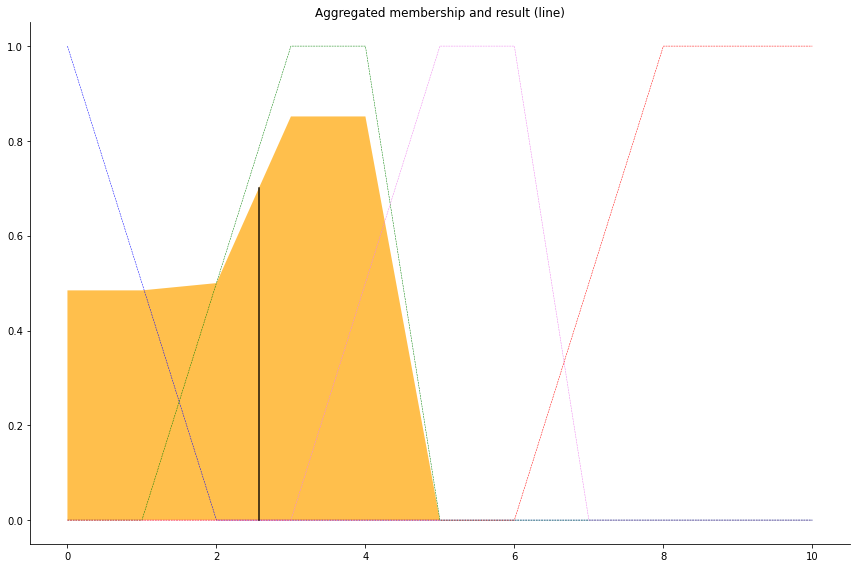

In [93]:
fig, graph5 = plt.subplots(figsize=(12, 8))

graph5.plot(plot_of_safety,
            graph_safeness[SAFE], 'b', linewidth=0.5, linestyle='--', )
graph5.plot(plot_of_safety,
            graph_safeness[PRECAUTION_NEEDED], 'g', linewidth=0.5, linestyle='--')
graph5.plot(plot_of_safety,
            graph_safeness[BAD], 'violet', linewidth=0.5, linestyle='--')
graph5.plot(plot_of_safety,
            graph_safeness[DANGEROUS], 'r', linewidth=0.5, linestyle='--')
graph5.fill_between(
    plot_of_safety, rule_activation[ZERO], aggregated, facecolor='Orange', alpha=0.7)
graph5.plot([safeness, safeness], [0, safeness_activation],
            'k', linewidth=1.5, alpha=0.9)
graph5.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (graph5,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### <b> Blue = Safe
### <b> Green = precaution Needed
### <b> Violet = Bad
### <b> Red = Dangerous


In [94]:
print(f'Safeness score of the country: {safeness}')

Safeness score of the country: 2.5686491210975966
